# 深度循环神经网络

事实上，我们可以将多个循环神经网络堆叠在一起，组成深度循环神经网络。

不同层记录着不同意义的数据，比如说底层可能记录着较短期的时间动态，而高层则记录着整体的趋势。

![jupyter](../images/rnn/deep-rnn.svg)

计算公式为：

$$\mathbf{H}_{t}^{(l)}=\phi_{l}(\mathbf{H}_{t}^{(l-1)}\mathbf{W}_{xh}^{(l)} + \mathbf{H}_{t-1}^{(l)}\mathbf{W}_{hh}^{(l)} + \mathbf{b}_{h}^{(l)})$$

其中 $l=1,...,L$。

最终输出层：

$$\mathbf{O}_{t} = \mathbf{H}_{t}^{(L)}\mathbf{W}_{hq} + \mathbf{b}_{q}$$

## 训练

In [1]:
from torch import nn
import d2l

# 载入数据
batch_size, num_steps = 32, 40
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [2]:
num_layers = 2
num_hiddens = 128
# 这里指定num_layers=2，而不是默认的1
deep_gru_layer = nn.GRU(len(vocab), num_hiddens, num_layers)
net = d2l.RNNModel(deep_gru_layer, len(vocab))

time traveller and the sound the sound the sound the sound the s


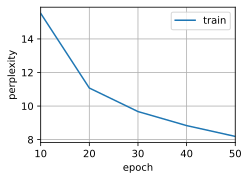

In [3]:
# 训练
num_epochs, lr = 50, 0.1
d2l.train_language_model(net, train_iter, vocab, lr, num_epochs)